In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle("data/jaguara_wind_parameters.pkl")
df.head()

,Temperatura a 2m °C,ano,dia,direção do vento,hora,pressão hpa,temperatura interna,umidade relativa a 2 m,velocidade do vento a 10m
0,26.43,2004,1,111.6,100,1009.2,26.16,69.77,4.911
1,26.04,2004,1,114.1,200,1009.5,25.70,72.70,4.995
2,25.57,2004,1,117.0,300,1009.7,25.17,77.10,3.355
3,25.23,2004,1,122.8,400,1009.8,24.72,78.30,2.798
4,25.10,2004,1,133.2,500,1010.4,24.40,78.10,2.744


In [6]:
df.describe()

,Temperatura a 2m °C,ano,dia,direção do vento,hora,pressão hpa,temperatura interna,umidade relativa a 2 m,velocidade do vento a 10m
count,26304.000000,34586.000000,34586.000000,34586.000000,34586.000000,34586.000000,34586.000000,26304.000000,34586.000000
mean,27.522755,2005.478228,181.349303,111.758508,1250.667900,1010.765471,30.085737,68.961897,3.859031
std,3.145637,1.111951,105.060723,139.911745,692.173759,6.199919,6.127799,15.509999,2.124774
min,19.430000,2004.000000,1.000000,0.000000,100.000000,599.940000,18.550000,23.560000,0.000000
25%,25.110000,2004.000000,91.000000,78.100000,700.000000,1009.400000,25.042500,58.027500,2.151000
50%,26.830000,2005.000000,181.000000,107.100000,1300.000000,1010.900000,27.740000,71.700000,3.901000
75%,29.910000,2006.000000,271.000000,135.200000,1900.000000,1012.600000,35.320000,81.400000,5.528000
max,37.050000,2007.000000,366.000000,6976.000000,2400.000000,1089.300000,48.610000,95.600000,9.990000



Analyzing the data, I see that there are values ​​in the direction of the wind of more than 360 degrees, which can not be, I will analyze it in greater depth

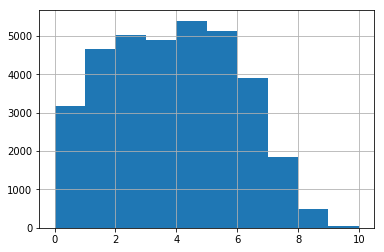

In [4]:
df["velocidade do vento a 10m"].hist()

In [11]:
len(df[df["direção do vento"]> 360])


26


I see that indeed, there are 26 records with addresses above 360.

### Outliers

In [8]:
from scipy import stats


def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(df)

Temperatura a 2m °C | 0 | float64
ano | 0 | int64
dia | 0 | int64
direção do vento | 26 | float64
hora | 0 | int64
pressão hpa | 255 | float64
temperatura interna | 1 | float64
umidade relativa a 2 m | 0 | float64
velocidade do vento a 10m | 0 | float64


/home/crespo/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


I can see that there are only outliers in wind pressure, in addition to the 26 records that have over 360 degrees in the direction of the wind.

In [12]:
df = df[
    (np.abs(stats.zscore(df["pressão hpa"])) < 3)  
]

In [13]:
outliers_col(df)

Temperatura a 2m °C | 0 | float64
ano | 0 | int64
dia | 0 | int64
direção do vento | 26 | float64
hora | 0 | int64
pressão hpa | 97 | float64
temperatura interna | 1 | float64
umidade relativa a 2 m | 0 | float64
velocidade do vento a 10m | 0 | float64


/home/crespo/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [14]:
df = df[
    (np.abs(stats.zscore(df["pressão hpa"])) < 3)  
]
outliers_col(df)

Temperatura a 2m °C | 0 | float64
ano | 0 | int64
dia | 0 | int64
direção do vento | 26 | float64
hora | 0 | int64
pressão hpa | 4 | float64
temperatura interna | 1 | float64
umidade relativa a 2 m | 0 | float64
velocidade do vento a 10m | 0 | float64


/home/crespo/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [18]:
df.shape

(34234, 9)

### Nan Values

In [15]:
n_records = len(df)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df)

Temperatura a 2m °C | 0.24177718058070924 | float64
ano | 0.0 | int64
dia | 0.0 | int64
direção do vento | 0.0 | float64
hora | 0.0 | int64
pressão hpa | 0.0 | float64
temperatura interna | 0.0 | float64
umidade relativa a 2 m | 0.24177718058070924 | float64
velocidade do vento a 10m | 0.0 | float64



I can observe how there is a 24% of the values ​​in temperature and humidity with null values, probably due to an error in the reading of the data by the meteorological station.

Since there are many values ​​with zero values, I will proceed to change the Nan values ​​by the average of each column

In [17]:
df[df['Temperatura a 2m °C'].isnull()]

,Temperatura a 2m °C,ano,dia,direção do vento,hora,pressão hpa,temperatura interna,umidade relativa a 2 m,velocidade do vento a 10m
26304,NaN,2007,1,62.10,100,1010.6,25.31,NaN,2.162
26305,NaN,2007,1,82.00,200,1010.2,25.09,NaN,0.080
26306,NaN,2007,1,89.50,300,1010.2,24.86,NaN,4.445
26307,NaN,2007,1,86.90,400,1010.5,24.90,NaN,4.497
26308,NaN,2007,1,87.20,500,1010.7,24.74,NaN,3.145
26309,NaN,2007,1,83.90,600,1011.6,24.83,NaN,3.775
26310,NaN,2007,1,82.30,700,1012.3,25.38,NaN,4.297
26311,NaN,2007,1,89.70,800,1012.6,27.21,NaN,4.935
26312,NaN,2007,1,81.60,900,1012.7,30.02,NaN,5.527
26313,NaN,2007,1,74.10,1000,1012.3,33.68,NaN,5.443



At the moment I will impute them with the media, later I will check if I delete them or make another type of imputation

In [23]:
from sklearn import impute

In [24]:
imputador = impute.SimpleImputer(strategy="mean")

In [28]:
var_imputado = imputador.fit_transform(df)


In [30]:
df_imputado = pd.DataFrame(var_imputado, index = df.index, columns= df.columns)
df_imputado.head()

,Temperatura a 2m °C,ano,dia,direção do vento,hora,pressão hpa,temperatura interna,umidade relativa a 2 m,velocidade do vento a 10m
0,26.43,2004.0,1.0,111.6,100.0,1009.2,26.16,69.77,4.911
1,26.04,2004.0,1.0,114.1,200.0,1009.5,25.70,72.70,4.995
2,25.57,2004.0,1.0,117.0,300.0,1009.7,25.17,77.10,3.355
3,25.23,2004.0,1.0,122.8,400.0,1009.8,24.72,78.30,2.798
4,25.10,2004.0,1.0,133.2,500.0,1010.4,24.40,78.10,2.744


In [32]:
df_imputado.shape

(34234, 9)

In [31]:
valores_inexistentes_col(df_imputado)

Temperatura a 2m °C | 0.0 | float64
ano | 0.0 | float64
dia | 0.0 | float64
direção do vento | 0.0 | float64
hora | 0.0 | float64
pressão hpa | 0.0 | float64
temperatura interna | 0.0 | float64
umidade relativa a 2 m | 0.0 | float64
velocidade do vento a 10m | 0.0 | float64


In [34]:
df_imputado.to_pickle("data/df_clean.pkl")